In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

a = np.arange(0, 10, 1)
b = np.arange(0, 10, 1)
p = np.array([a, b])
p

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [2]:
p_transpose = p.T
p_transpose

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [3]:
new_p = p_transpose.reshape(-1, 1, 2)
new_p, new_p.shape

(array([[[0, 0]],
 
        [[1, 1]],
 
        [[2, 2]],
 
        [[3, 3]],
 
        [[4, 4]],
 
        [[5, 5]],
 
        [[6, 6]],
 
        [[7, 7]],
 
        [[8, 8]],
 
        [[9, 9]]]),
 (10, 1, 2))

In [4]:
sm = np.concatenate([new_p[:-1], new_p[1:]], axis=1)
sm, sm.shape

(array([[[0, 0],
         [1, 1]],
 
        [[1, 1],
         [2, 2]],
 
        [[2, 2],
         [3, 3]],
 
        [[3, 3],
         [4, 4]],
 
        [[4, 4],
         [5, 5]],
 
        [[5, 5],
         [6, 6]],
 
        [[6, 6],
         [7, 7]],
 
        [[7, 7],
         [8, 8]],
 
        [[8, 8],
         [9, 9]]]),
 (9, 2, 2))

(1000, 1, 2)
[[[ 0.00000000e+00 -0.00000000e+00]
  [ 5.18324441e-09 -4.94468255e-06]]

 [[ 5.18324441e-09 -4.94468255e-06]
  [ 4.14658938e-08 -1.97786813e-05]]

 [[ 4.14658938e-08 -1.97786813e-05]
  [ 1.39947046e-07 -4.45018496e-05]]

 ...

 [[ 3.12272437e+00 -1.99995550e+00]
  [ 3.12901375e+00 -1.99998022e+00]]

 [[ 3.12901375e+00 -1.99998022e+00]
  [ 3.13530318e+00 -1.99999506e+00]]

 [[ 3.13530318e+00 -1.99999506e+00]
  [ 3.14159265e+00 -2.00000000e+00]]]


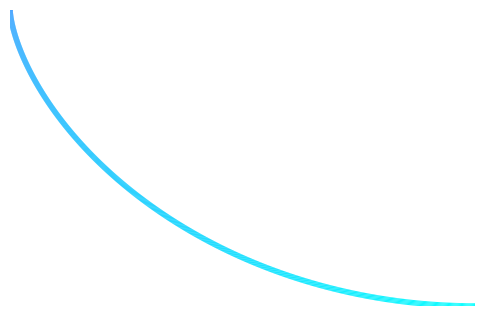

In [5]:
r = 1.0
n_points = 1000
t = np.linspace(0, np.pi, n_points)

# Cycloid
x = r * (t - np.sin(t))
y = r * (1 - np.cos(t))

# Flip
y = -y

# Colormap
colors = ['#007FFF', '#00FFFF']
cmap = 'azure_gradient'
new_cmap = LinearSegmentedColormap.from_list(cmap, colors, n_points)

points = np.array([x, y]).T.reshape(-1, 1, 2)
print(points.shape)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
print(segments)

# Plot setting

fig, ax = plt.subplots(figsize=(6, 4))

lc = LineCollection(segments, cmap=new_cmap, norm=plt.Normalize(t.min(), t.max())) # Gradient
lc.set_array(t)
lc.set_linewidth(4)

line = ax.add_collection(lc)

# Set limit
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

ax.axis('off')
ax.set_aspect('equal')

# Save SVG file
filename = 'cycloid_gradient.svg'
plt.savefig(filename, format='svg', bbox_inches='tight', transparent=True)

# plt.plot(x, y)
